In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading csv file 

df=pd.read_csv('Customers.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Data frame contains 5 features and 200 data points

This is unsupervised algorithm 

We need group the people on basis of their annual income and spending



In Kmeans 'K ' is hyperparameter so first we need to find the correct k value using elbow technique

In [59]:
# converting dataframe into array
features=df.iloc[:,[3,4]].values

In [60]:
features

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [45]:
from sklearn.cluster import KMeans

In [46]:
objective_function=[] # objective function is nothing but argmin of c sum of (|x-c|)^2   c: centroid ,x=point in data set
for i in range(1,11):
    clustering=KMeans(n_clusters=i, init='k-means++')
    clustering.fit(features)
    objective_function.append(clustering.inertia_)   # inertia is calculaing min intra distance

In [61]:
objective_function

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25028.020475269397,
 21913.929201194416,
 19701.35225128174]

## Hyper parameter tuning

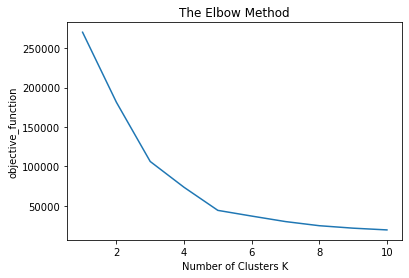

In [62]:
# for finding optimal no of clusters we use elbow techniue 
# Elbow technique is plot between no of clusters and objective_function 
# we take k value where the objective function values decreases slowly
plt.plot(range(1,11),objective_function)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('objective_function')
plt.show()

In the above graph if we observe after k=5 objective function values decreases slowly

## Model Training

In [48]:
# Training the model with optimal no of clusters

tuned_clustering=KMeans(n_clusters=5,init='k-means++',random_state=0)
labels=tuned_clustering.fit_predict(features)


In [63]:
# x and y  coordinates of all clusters
# Centroids of clusters
tuned_clustering.cluster_centers_[:]

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [73]:
# array of clusters of each point (predicted clusters for points)
labels

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [79]:
# coordinates of cluster1 with respective x axis(income)
features[labels==0,0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)

In [80]:
# coordinates of cluster1 with respective y axis(spending)
features[labels==0,1]

array([61, 55, 47, 42, 42, 52, 60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55,
       52, 59, 51, 59, 50, 48, 59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52,
       42, 51, 55, 41, 44, 57, 46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52,
       47, 50, 42, 49, 41, 48, 59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42,
       46, 48, 50, 43, 59, 43, 57, 56, 40, 58, 35, 34, 40], dtype=int64)

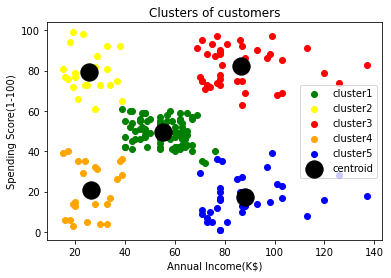

In [55]:
# visualizing the clusters

plt.scatter(features[labels==0,0],features[labels==0,1],c='green',label='cluster1')
plt.scatter(features[labels==1,0],features[labels==1,1],c='yellow',label='cluster2')
plt.scatter(features[labels==2,0],features[labels==2,1],c='red',label='cluster3')
plt.scatter(features[labels==3,0],features[labels==3,1],c='orange',label='cluster4')
plt.scatter(features[labels==4,0],features[labels==4,1],c='blue',label='cluster5')


plt.scatter(tuned_clustering.cluster_centers_[:,0],tuned_clustering.cluster_centers_[:,1],s=300,c='black',label='centroid')


plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()





## Evaluation

In [104]:
from sklearn.metrics import davies_bouldin_score 

In [106]:
print(davies_bouldin_score(features, tuned_clustering.labels_)) 

0.5725628995597086


In [107]:
 from sklearn import metrics

In [108]:
metrics.silhouette_score(features, tuned_clustering.labels_, metric='euclidean')


0.553931997444648